In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('mushrooms.csv')

In [11]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
from sklearn.preprocessing import LabelEncoder


In [13]:
labelencoder= LabelEncoder()

for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
 

In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [47]:
df['class'].unique()

array([1, 0])

In [6]:
# edible 0
# poison 1

In [15]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [16]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

### Splitting Dataset

In [18]:
# Splitting with train_test_split_method

from sklearn.model_selection import train_test_split

In [19]:
# Train Test

xtrain,xtest,ytrain,ytest =  train_test_split(df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']], df['class'], train_size=.8, random_state=42)

In [20]:
len(xtrain), len(xtest), len(ytrain), len(ytest)

(6499, 1625, 6499, 1625)

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model_logis = LogisticRegression(multi_class='auto', solver='liblinear') 

model_logis.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Decision Tree

In [23]:
from sklearn import tree

In [24]:
model_tree = tree.DecisionTreeClassifier(max_depth=3)

model_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model_rf = RandomForestClassifier()
model_rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Evaluation Metrics

In [27]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score

In [29]:
y_pred_log = model_logis.predict(xtest)

print('Balanced-Acc : ', round(balanced_accuracy_score(ytest, y_pred_log)*100,2), '%')
print('Precision(+) : ', round(precision_score(ytest, y_pred_log, pos_label=1)*100,2), '%')
print('Precision(-) : ', round(precision_score(ytest, y_pred_log, pos_label=0)*100,2), '%')
print('Recall(+)    : ', round(recall_score(ytest, y_pred_log, pos_label=1)*100,2), '%')
print('Recall(-)    : ', round(recall_score(ytest, y_pred_log, pos_label=0)*100,2), '%')
print('F1 score(+)  : ', round(f1_score(ytest, y_pred_log, pos_label=1)*100,2), '%')
print('F1 score(-)  : ', round(f1_score(ytest, y_pred_log, pos_label=0)*100,2), '%')
print('Nilai ROC&AUC    : ', round(roc_auc_score(ytest, y_pred_log)*100,2), '%')

Balanced-Acc :  94.65 %
Precision(+) :  94.27 %
Precision(-) :  95.0 %
Recall(+)    :  94.63 %
Recall(-)    :  94.66 %
F1 score(+)  :  94.45 %
F1 score(-)  :  94.83 %
Nilai ROC&AUC    :  94.65 %


In [30]:
y_pred_tree = model_tree.predict(xtest)

print('Balanced-Acc : ', round(balanced_accuracy_score(ytest, y_pred_tree)*100,2), '%')
print('Precision(+) : ', round(precision_score(ytest, y_pred_tree, pos_label=1)*100,2), '%')
print('Precision(-) : ', round(precision_score(ytest, y_pred_tree, pos_label=0)*100,2), '%')
print('Recall(+)    : ', round(recall_score(ytest, y_pred_tree, pos_label=1)*100,2), '%')
print('Recall(-)    : ', round(recall_score(ytest, y_pred_tree, pos_label=0)*100,2), '%')
print('F1 score(+)  : ', round(f1_score(ytest, y_pred_tree, pos_label=1)*100,2), '%')
print('F1 score(-)  : ', round(f1_score(ytest, y_pred_tree, pos_label=0)*100,2), '%')
print('Nilai ROC&AUC    : ', round(roc_auc_score(ytest, y_pred_tree)*100,2), '%')

Balanced-Acc :  95.29 %
Precision(+) :  92.82 %
Precision(-) :  97.63 %
Recall(+)    :  97.57 %
Recall(-)    :  93.0 %
F1 score(+)  :  95.14 %
F1 score(-)  :  95.26 %
Nilai ROC&AUC    :  95.29 %


In [31]:
y_pred_rf = model_rf.predict(xtest)

print('Balanced-Acc : ', round(balanced_accuracy_score(ytest, y_pred_rf)*100,2), '%')
print('Precision(+) : ', round(precision_score(ytest, y_pred_rf, pos_label=1)*100,2), '%')
print('Precision(-) : ', round(precision_score(ytest, y_pred_rf, pos_label=0)*100,2), '%')
print('Recall(+)    : ', round(recall_score(ytest, y_pred_rf, pos_label=1)*100,2), '%')
print('Recall(-)    : ', round(recall_score(ytest, y_pred_rf, pos_label=0)*100,2), '%')
print('F1 score(+)  : ', round(f1_score(ytest, y_pred_rf, pos_label=1)*100,2), '%')
print('F1 score(-)  : ', round(f1_score(ytest, y_pred_rf, pos_label=0)*100,2), '%')
print('Nilai ROC&AUC    : ', round(roc_auc_score(ytest, y_pred_rf)*100,2), '%')

Balanced-Acc :  100.0 %
Precision(+) :  100.0 %
Precision(-) :  100.0 %
Recall(+)    :  100.0 %
Recall(-)    :  100.0 %
F1 score(+)  :  100.0 %
F1 score(-)  :  100.0 %
Nilai ROC&AUC    :  100.0 %


###  Pilih Random Forest

In [33]:
print(f'RandomForest Score : {model_rf.score(xtest, ytest)}')

RandomForest Score : 1.0


In [74]:
# edible 0
# poison 1

dfCompare = pd.DataFrame({
    'ytest': ytest,
    'y_pred_rf':y_pred_rf})

dfCompare

,ytest,y_pred_rf
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
...,...,...
7374,1,1
1149,0,0
4999,1,1
7497,1,1


In [73]:
dfCompare[dfCompare['ytest']!=dfCompare['y_pred_rf']]

,ytest,y_pred_rf


- Prediksi benar semua dengan Random Forest

### PLOT ROC AUC

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

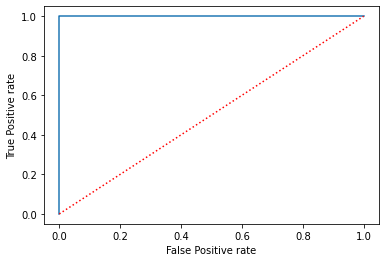

In [45]:
# plot ROC curve
# roc_curve(df['y'], df['proba'])
fpr, tpr, thres = roc_curve(ytest, model_rf.predict_proba(xtest)[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()